# Teste de Performance 9

Pedro Monteiro Vieira Bayma Azevedo
Projeto de Bloco: Análise, Qualidade e Governança de Dados
Ciências de Dados 

## Importing Libraries and Reading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# reading data
df = pd.read_csv('Salary Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
372,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
373,43.0,Male,Master's,Director of Operations,19.0,170000.0
374,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
375,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  375 non-null    float64
 1   Gender               375 non-null    object 
 2   Education Level      375 non-null    object 
 3   Job Title            375 non-null    object 
 4   Years of Experience  375 non-null    float64
 5   Salary               375 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.8+ KB


In [4]:
df.describe()

,Age,Years of Experience,Salary
count,375.000000,375.000000,375.000000
mean,37.477333,10.178133,100920.933333
std,7.079298,6.840697,48407.447337
min,23.000000,0.100000,350.000000
25%,31.500000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.500000,140000.000000
max,53.000000,40.000000,250000.000000


### 1. A verificação se há dados faltantes e diga qual a estratégia que será tomada em relação a esses dados


In [5]:
# searching for null values in all columns
df.notnull().all()

Age                    False
Gender                 False
Education Level        False
Job Title              False
Years of Experience    False
Salary                 False
dtype: bool

In [6]:
# identifying null data by row
df[df.isnull().any(axis=1)]


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
174,NaN,NaN,NaN,NaN,NaN,NaN
262,NaN,NaN,NaN,NaN,NaN,NaN


Como pode ser observado, possuímos duas linhas com dados faltantes. Nesse caso, considerando que: (i) não há nenhum dado disponível, ou seja, todos os dados do registro estão faltantes e (ii) a representatividade dos dados é de 0,5% (2/377), a estratégia será de eliminação das linhas conforme código a seguir. 

In [7]:
# dropping rows
df = df.dropna(axis=0, how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 0 to 376
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  375 non-null    float64
 1   Gender               375 non-null    object 
 2   Education Level      375 non-null    object 
 3   Job Title            375 non-null    object 
 4   Years of Experience  375 non-null    float64
 5   Salary               375 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.5+ KB


In [8]:
# checking the drop
df.notnull().all()

Age                    True
Gender                 True
Education Level        True
Job Title              True
Years of Experience    True
Salary                 True
dtype: bool

### 2. O uso técnicas de estatística descritiva para compreender e descrever os dados. Use gráficos, tabelas e texto para descrever os seus achados.

Obs: Como Salary será nossa variável alvo, a análise será realizada para as outras variáveis do conjunto de dados.

In [9]:
df.describe()

,Age,Years of Experience,Salary
count,375.000000,375.000000,375.000000
mean,37.477333,10.178133,100920.933333
std,7.079298,6.840697,48407.447337
min,23.000000,0.100000,350.000000
25%,31.500000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.500000,140000.000000
max,53.000000,40.000000,250000.000000


In [10]:
# calculation percent difference between mean and median
age_diference = 100*(df['Age'].mean() - df['Age'].median())/df['Age'].median()
age_diference

4.103703703703705

In [11]:
# calculation percent difference between mean and median
years_diference = 100*(df['Years of Experience'].mean() - df['Years of Experience'].median())/df['Years of Experience'].median()
years_diference

13.09037037037037

A partir do resultado do .describe() pôde-se observar que tanto na feature Age quanto na feature Years of Experience os valores da média e mediana próximos, com uma diferença percentual de 4,10% e 13,08% respectivamente. Outro ponto a ser observado é que nos 2 casos a média é maior que a mediana. Essas observações indicam, no caso de Age, uma distribuição próxima a uma normal, com dados concentrados próximos à média e mediana e uma assimetria à direta no caso de Year of Experience, bem como a possibilidade de outliers à direita.

Por fim, o desvio padrão de Age é maior do que o de Years of Experience, indicando um maior espalhamento dos valores com relação à média.

A seguir, verificaremos, por meio de histogramas, a comprovação do observado a partir da estatística descritiva (df.describe()).

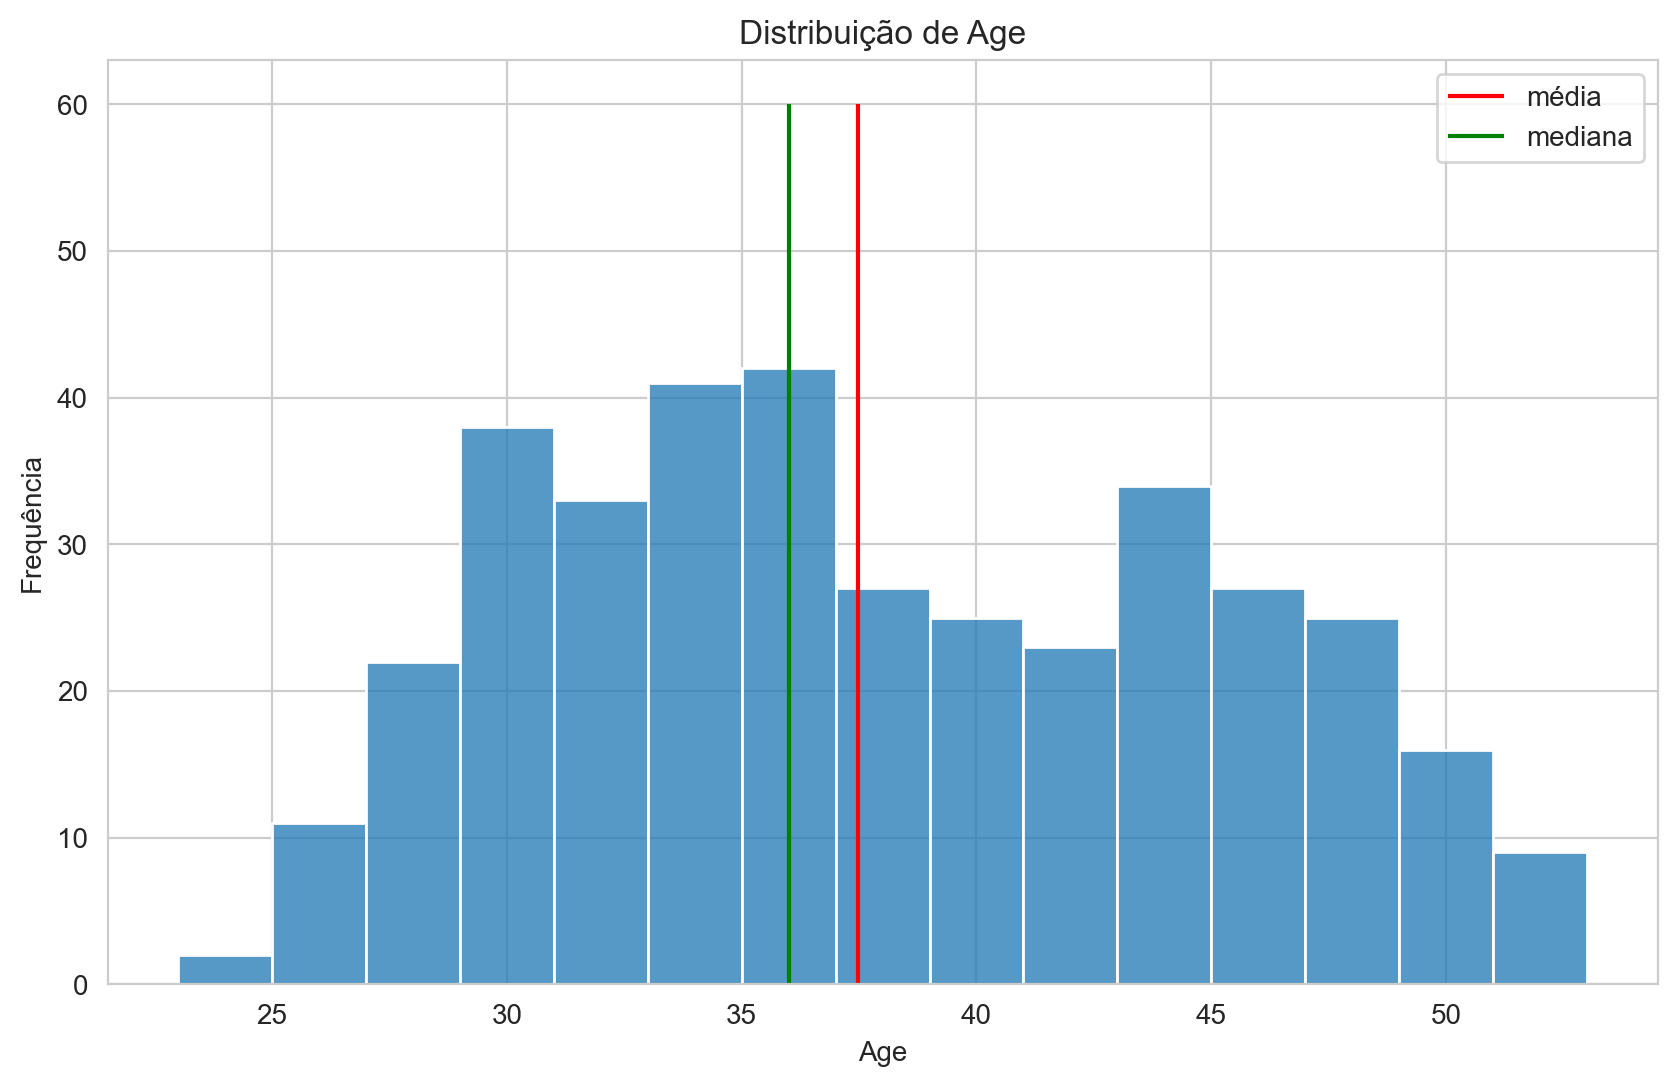

In [12]:
plt.figure(figsize=(10,6), dpi=200)

# creating mean line
plt.vlines(x=df['Age'].mean(), ymin=0, ymax=60, colors='red', label='média')

# creating median line
plt.vlines(x=df['Age'].median(), ymin=0, ymax=60, colors='green', label ='mediana')

# histogram plot
sns.histplot(data=df, x='Age', bins=15)

# adjusting plot

plt.ylabel('Frequência')
plt.legend()
plt.title('Distribuição de Age')

plt.show()

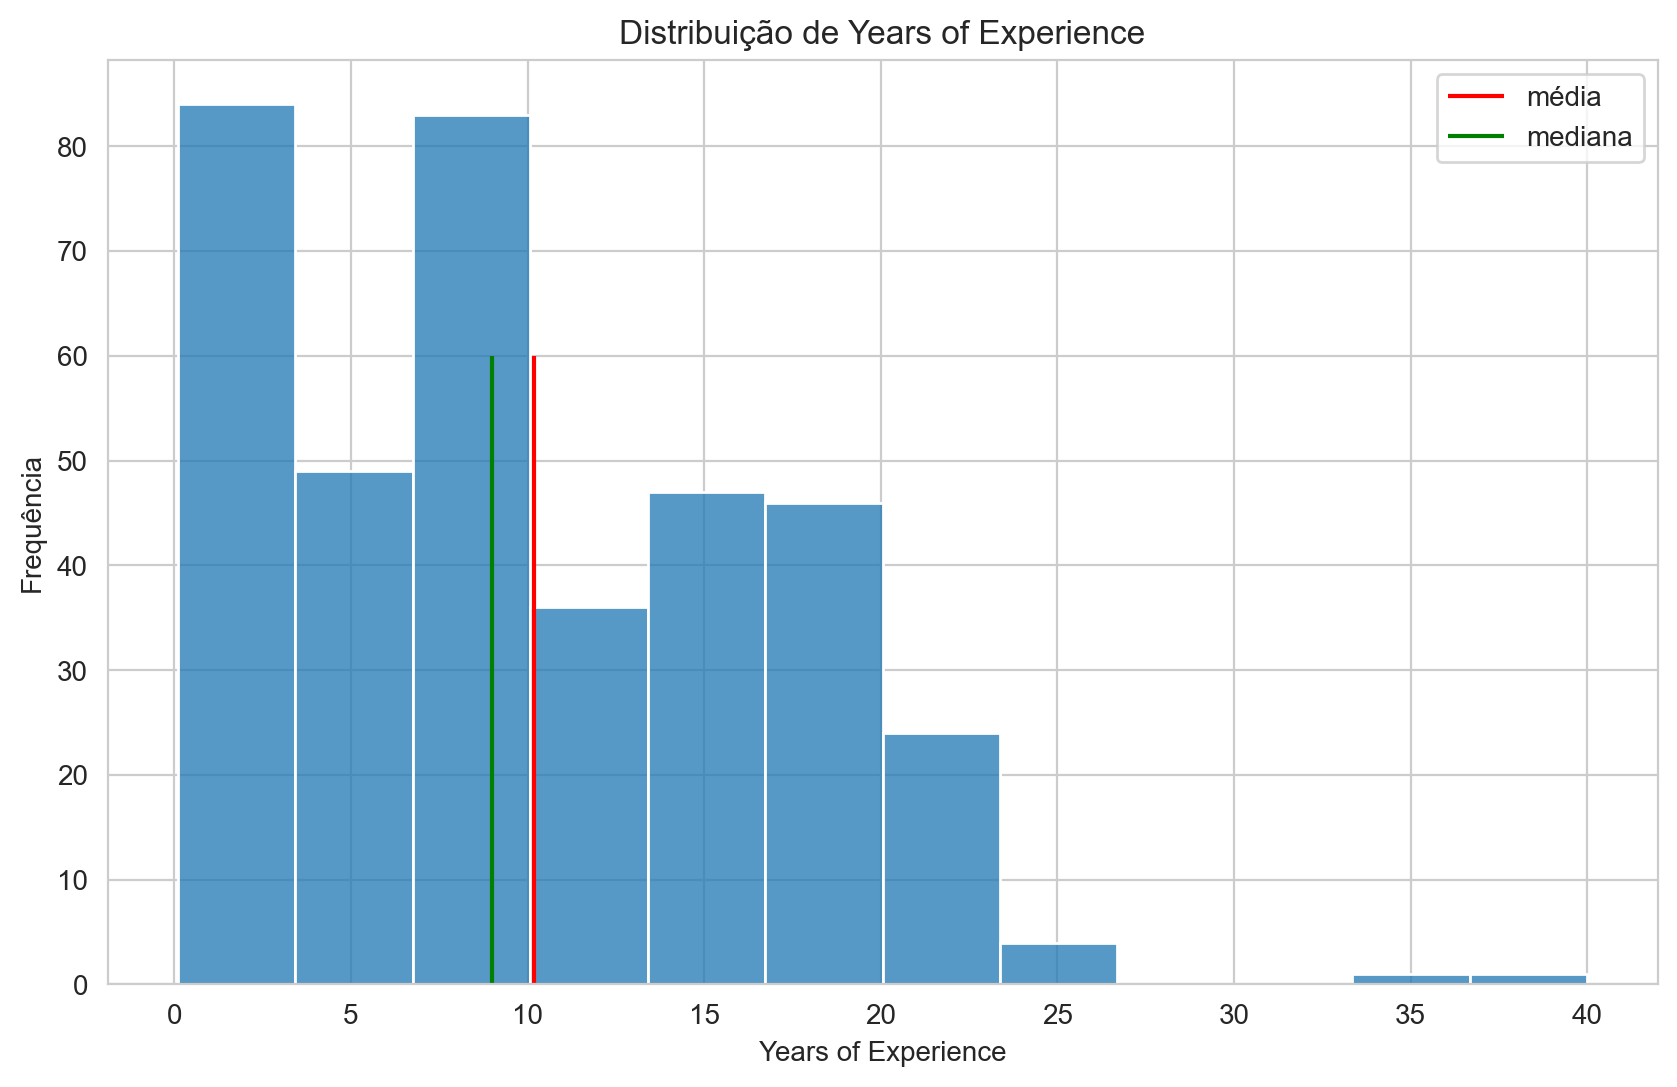

In [13]:
plt.figure(figsize=(10,6), dpi=200)

# creating mean line
plt.vlines(x=df['Years of Experience'].mean(), ymin=0, ymax=60, colors='red', label='média')

# creating median line
plt.vlines(x=df['Years of Experience'].median(), ymin=0, ymax=60, colors='green', label ='mediana')

# histogram plot
sns.histplot(data=df, x='Years of Experience', bins=12)

# adjusting plot
plt.ylabel('Frequência')
plt.legend()
plt.title('Distribuição de Years of Experience')

plt.show()

In [14]:
# calculating the skewness of the 2 features

age_initial_skewness = round(df['Age'].skew(),3)
experience_initial_skewness = round(df['Years of Experience'].skew(),3)

print(f"A assimetria inicial de Age é igual a {age_initial_skewness}")

print(f"A assimetria inicial de Years of Experience é igual a {experience_initial_skewness}")

A assimetria inicial de Age é igual a 0.187
A assimetria inicial de Years of Experience é igual a 0.609


Conforme exposto, as conclusões observadas por meio do dados da estatística descritiva se confirmaram também visualmente nos gráficos, bem como no cálculo da medida de assimetria das duas variáveis, no qual restou claro uma maior assimetria à direita no caso de Years of Experience.

### 3. Calcule a média e o desvio padrão para todas as variáveis. Em alguma variável, essas duas medidas não bastam para descrever o problema? Por quê?

In [15]:
# Calculating mean and standard deviation
df.describe()

,Age,Years of Experience,Salary
count,375.000000,375.000000,375.000000
mean,37.477333,10.178133,100920.933333
std,7.079298,6.840697,48407.447337
min,23.000000,0.100000,350.000000
25%,31.500000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.500000,140000.000000
max,53.000000,40.000000,250000.000000


Em algumas variáveis, somente a média e o desvio padrão não são suficientes para descrever os dados, identificar padrões/tendências e outliers. 

No caso do dataset em análise, temos o caso de algumas variáveis categóricas que não apresentam valores numéricos, nesse caso seria importante verificar/plotar um barplot com a frequência das categorias. 

Outro ponto interessante de ser abordado é a verificação de outliers, principalmente no caso de Years of Experience que pode ser feito por meio de um box plot e que somente com a média e o desvio padrão podem não ficar tão claros. 

Por fim, seria também interessante, considerando a intenção de se utilizar um modelo de regressão linear, verificar a correlação entre os dados. Todavia, esse passo será realizado somente após a transformação dos dados categóricos.

#### Categorical Variables

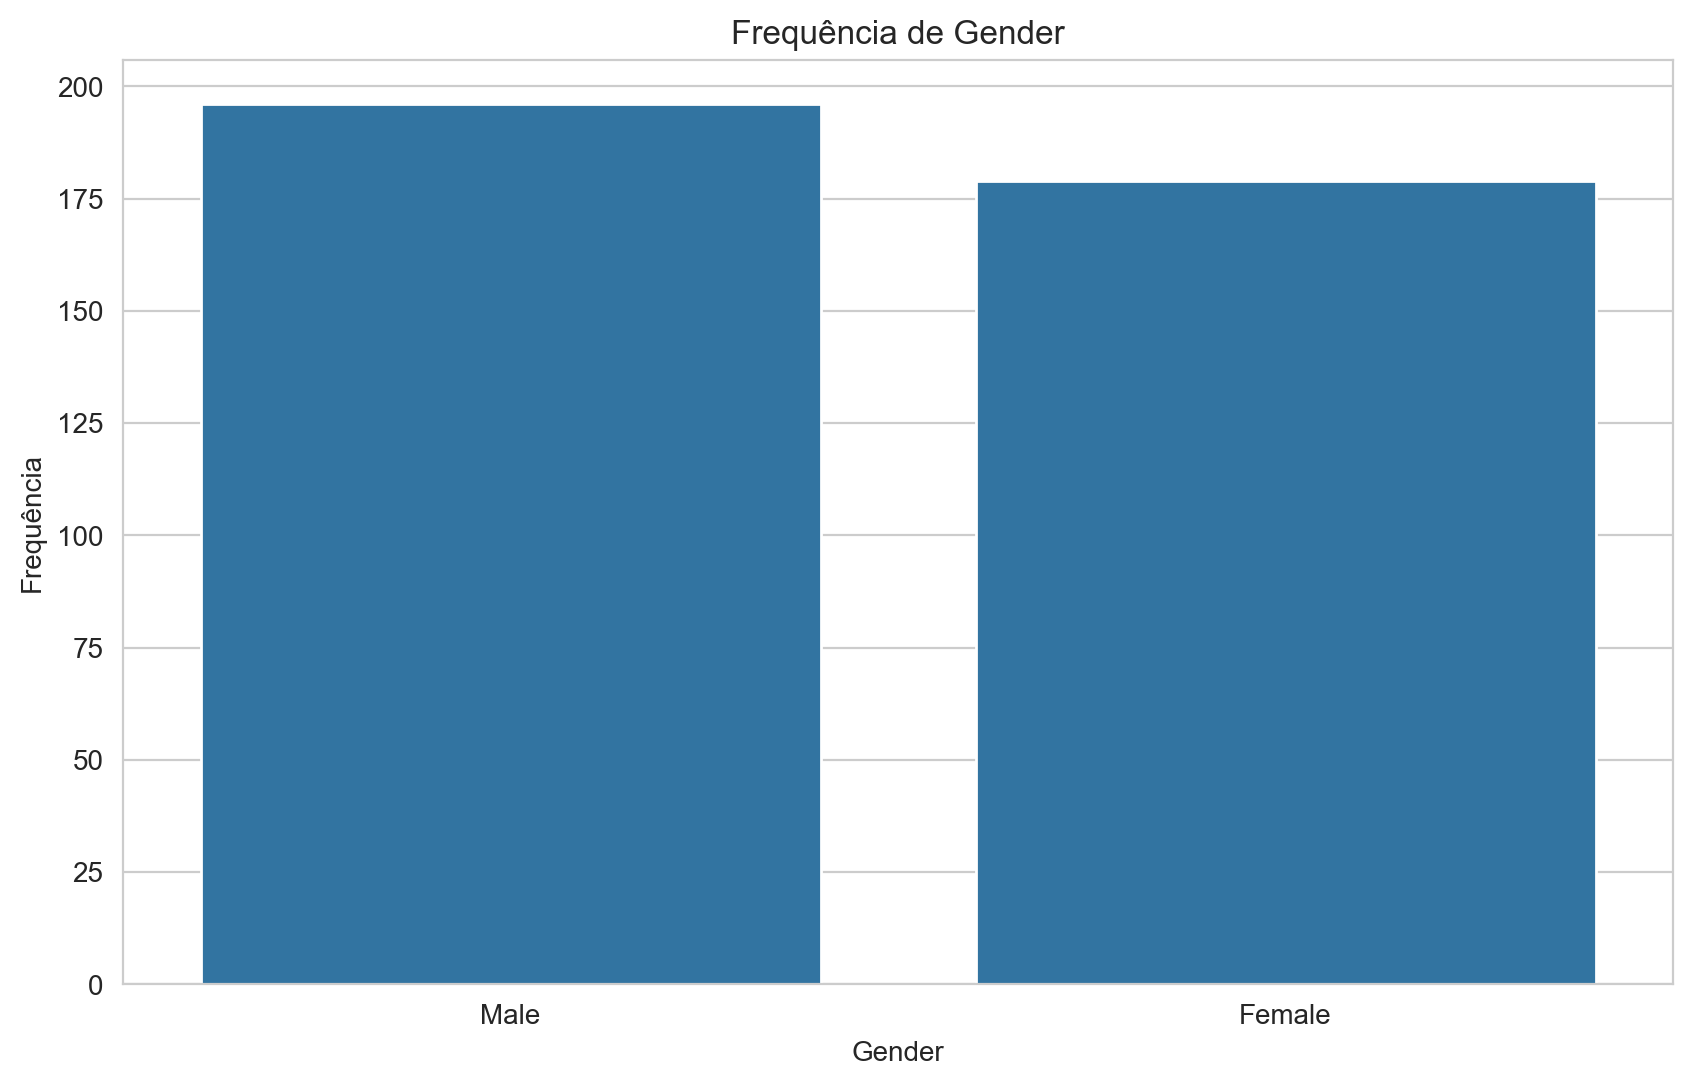

In [16]:
# categorical variables plots
plt.figure(figsize=(10,6), dpi=200)

# bar plot
sns.countplot(data=df, x='Gender')

# adjusting plot
plt.ylabel('Frequência')
plt.title('Frequência de Gender')

plt.show()

Pode-se observar um pouco mais de homens do que mulheres, todavia uma base equilibrada.

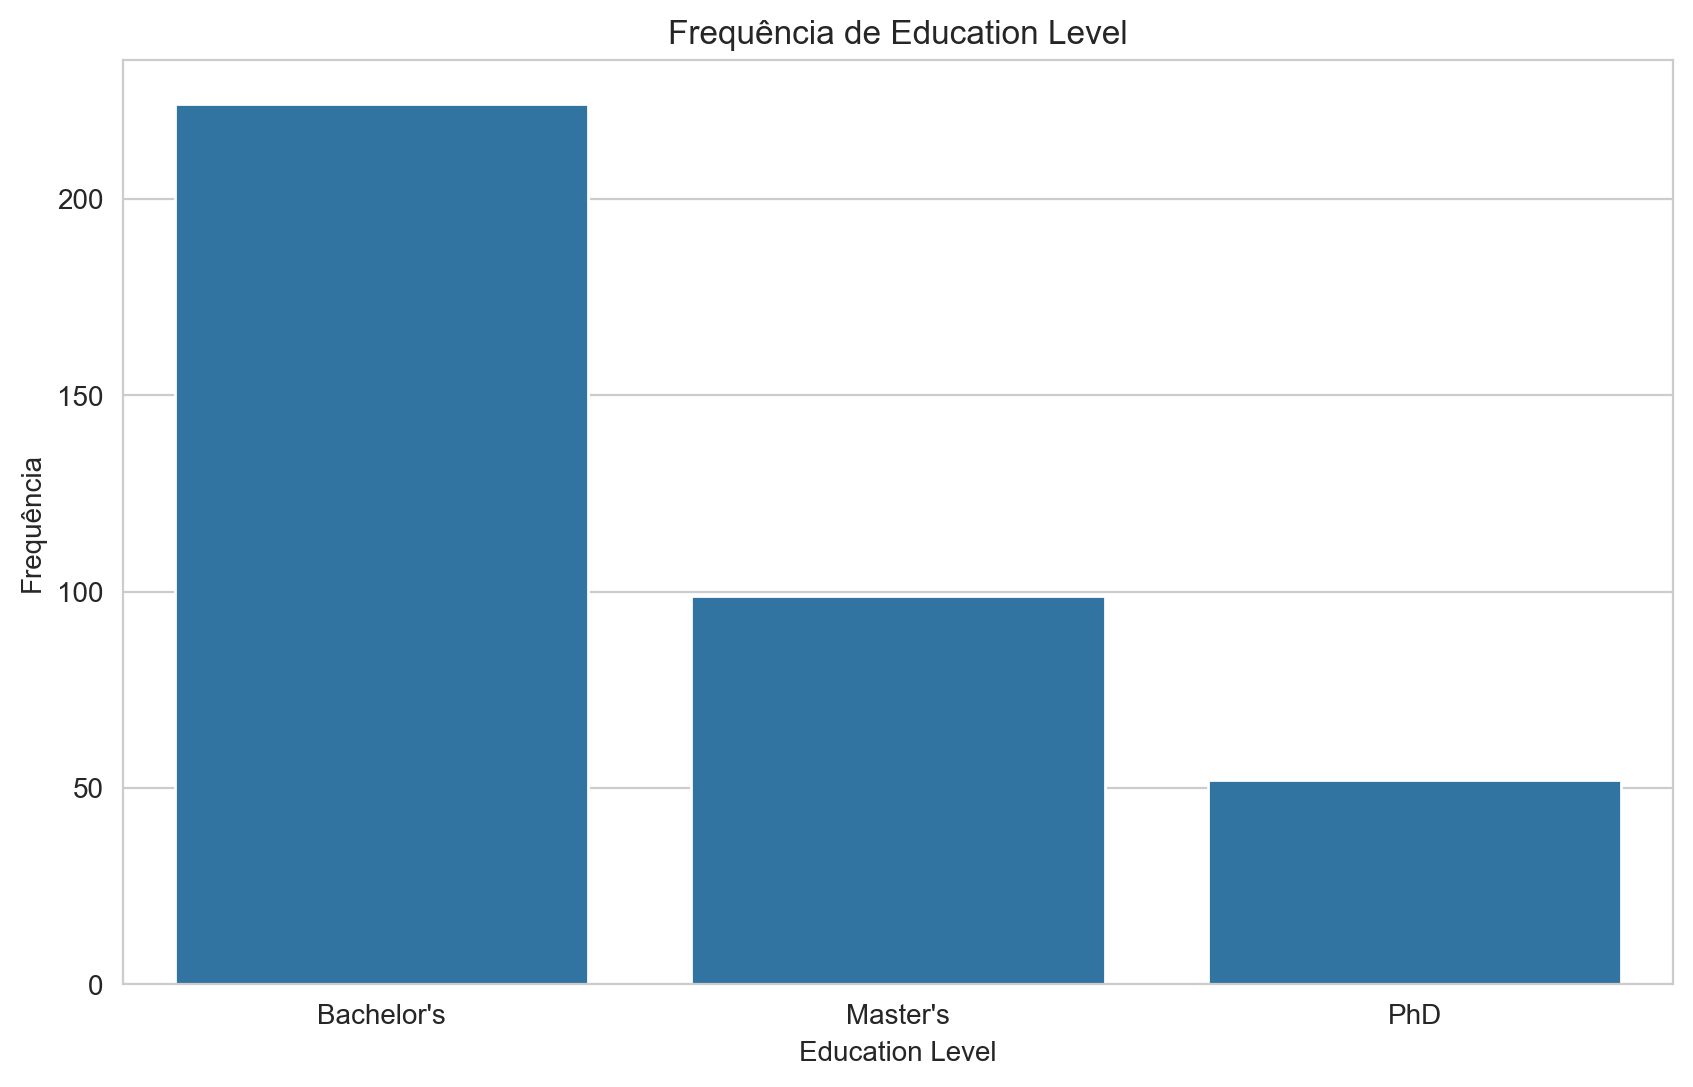

In [17]:
# categorical variables plots
plt.figure(figsize=(10,6), dpi=200)

# bar plot
sns.countplot(data=df, x='Education Level')

# adjusting plot
plt.ylabel('Frequência')
plt.title('Frequência de Education Level')

plt.show()

Com relação ao Education Level, pode-se observar um número maior de Bachelors do que dos outros níveis educacionais, o que é aderente a realidade e esperado considerando o aumento do nível do esforço e a necessidade de uma graduação para se fazer um mestrado e de um mestrado para se fazer um PhD.

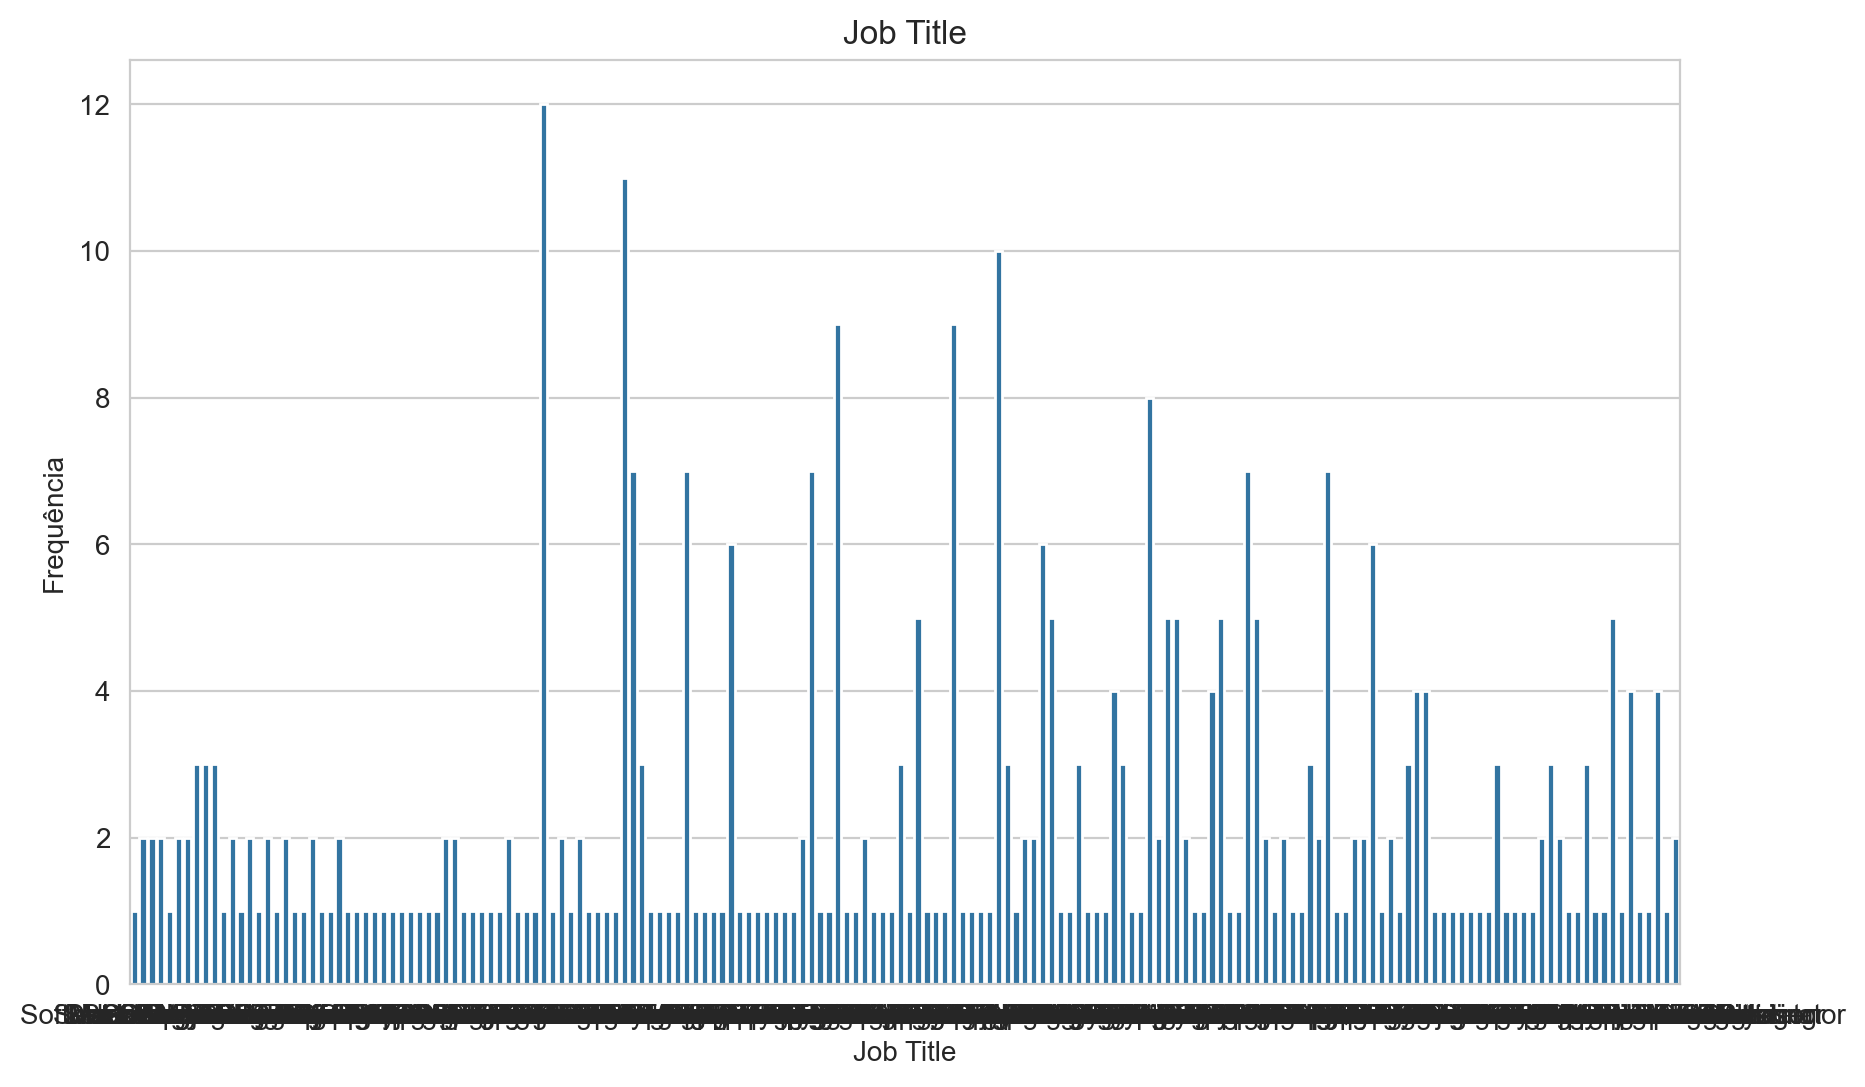

In [18]:
# categorical variables plots
plt.figure(figsize=(10,6), dpi=200)

# bar plot
sns.countplot(data=df, x='Job Title')

# adjusting plot
plt.ylabel('Frequência')
plt.title('Job Title')

plt.show()

In [19]:
df['Job Title'].value_counts().size

174

Com relação ao Job Title, pode-se observar uma grande quantidade de posições (174), todavia não há uma concentração em nenhuma delas considerando que a maior é 12. A seguir tabela que mostra as 15 maiores frequências: 

In [20]:
df['Job Title'].value_counts().head(15)

Job Title
Director of Marketing                    12
Director of Operations                   11
Senior Business Analyst                  10
Senior Marketing Manager                  9
Senior Marketing Analyst                  9
Junior Business Analyst                   8
Junior Financial Analyst                  7
Junior Business Development Associate     7
Senior Financial Analyst                  7
Senior Data Scientist                     7
Senior Project Manager                    7
Junior Marketing Coordinator              6
Senior Product Manager                    6
Senior Software Engineer                  6
Junior Project Manager                    5
Name: count, dtype: int64

#### Outliers

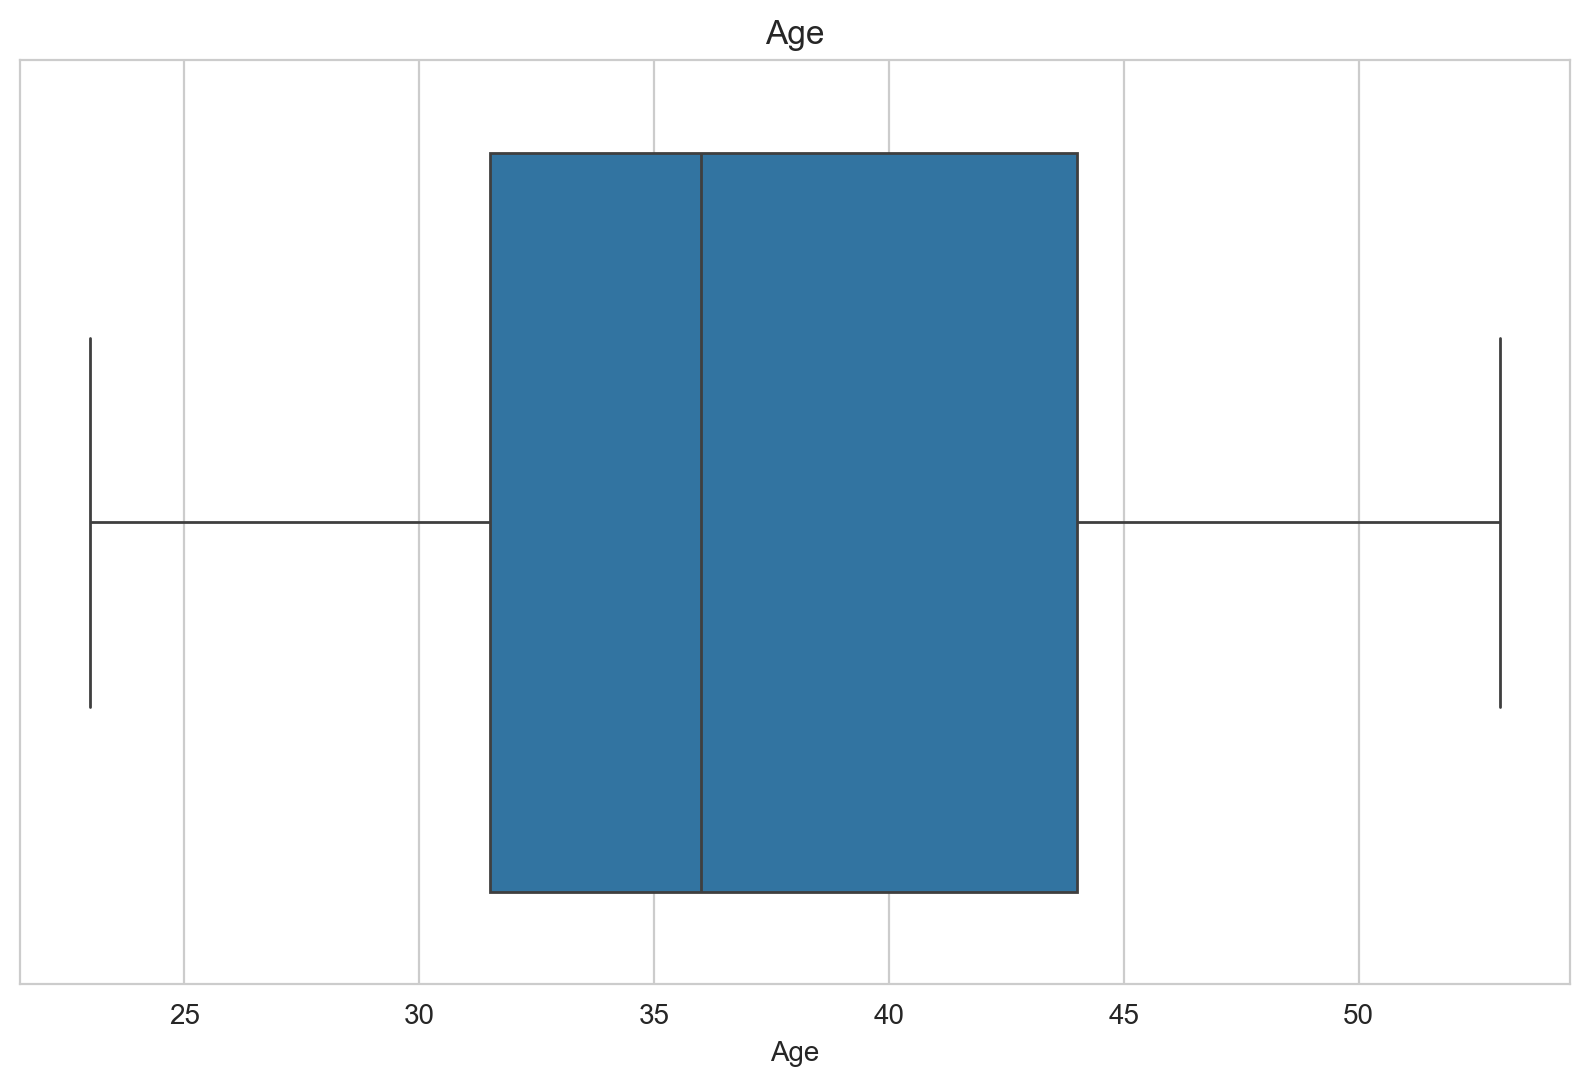

In [21]:
plt.figure(figsize=(10,6), dpi=200)

# box plot
sns.boxplot(data=df, x='Age')

# adjusting plot
plt.title('Age')

plt.show()

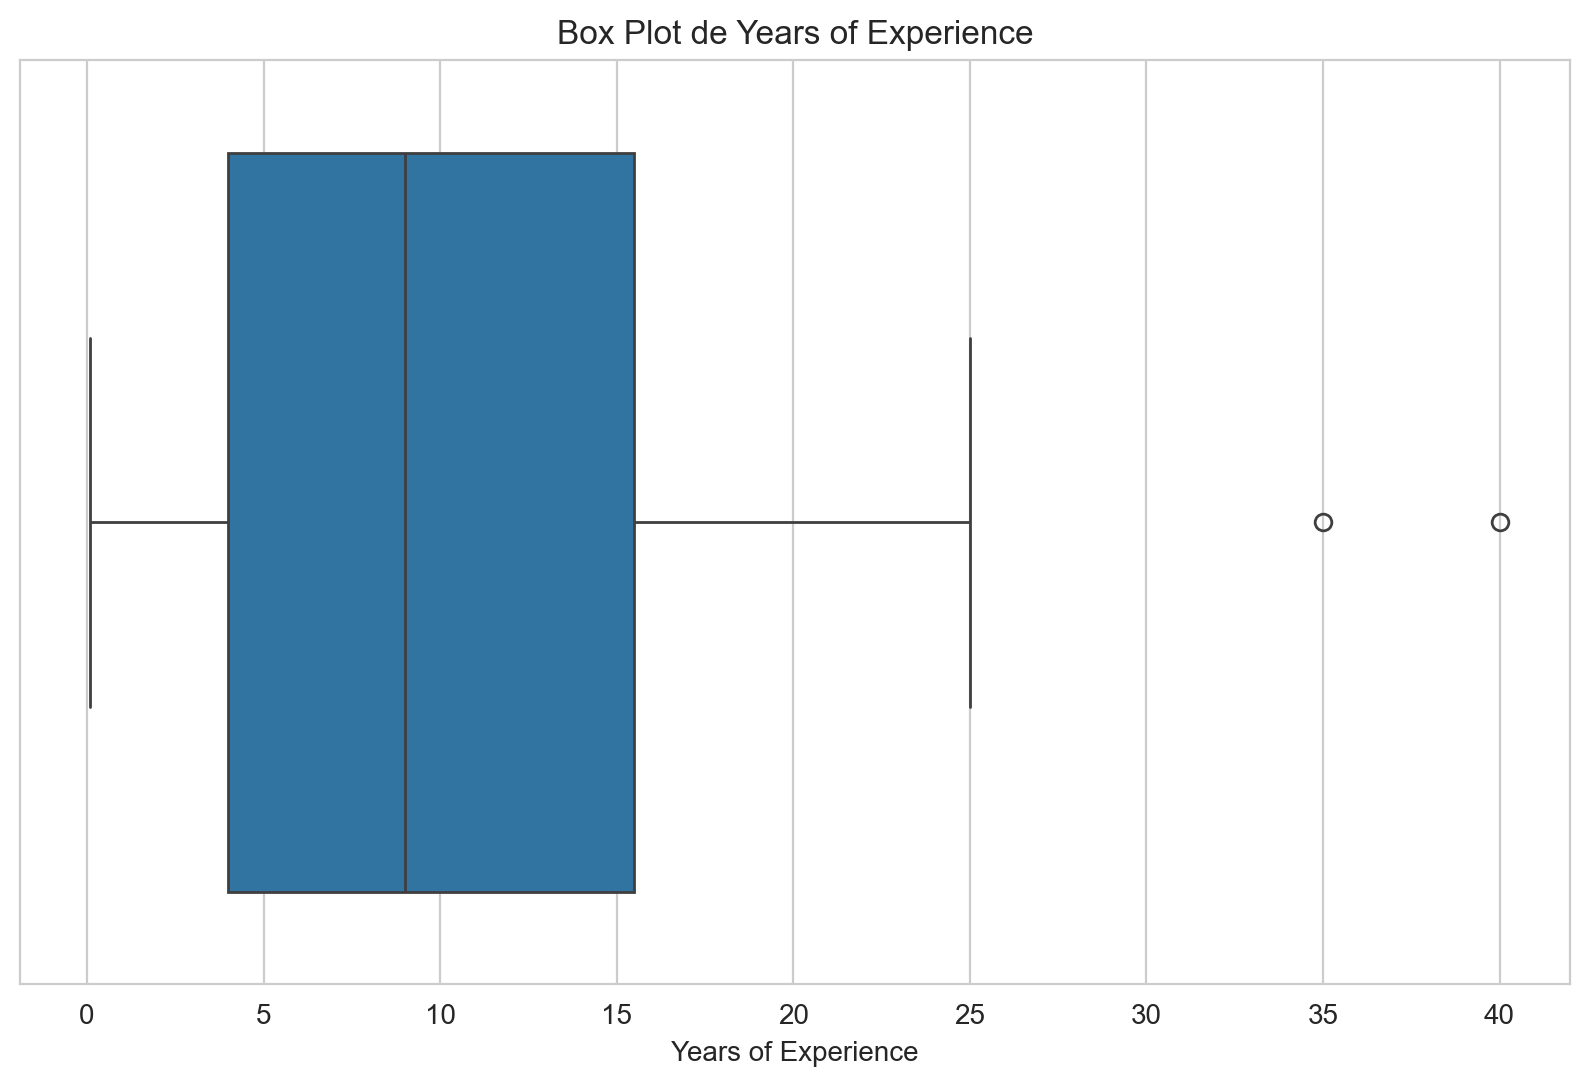

In [22]:
plt.figure(figsize=(10,6), dpi=200)

# box plot
sns.boxplot(data=df, x='Years of Experience')

# adjusting plot
plt.title('Box Plot de Years of Experience')

plt.show()

A partir dos box plots pode-se observar, pelo critério de 1,5 IQR, a existência de 2 outliers nos dados de Years of Experience.

### 4. Caso exista algum dado representando datas, padronize as variáveis representando datas. 

Não existem dados de datas

### 5. Caso você encontre mais problemas na base (outliers, dados incompatíveis, problema de formato), realize pequenos reparos em uma base com problemas de qualidade. Descreva cada um dos problemas e enumere as dimensões de qualidade afetadas.

Como foram encontrados outliers em Years of Experience, iremos excluir esses dados uma vez que são apenas 2 casos em 375 registros, ou seja, 0,5%.

In [23]:
# finding indexes
df[df['Years of Experience']>25]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
38,44.0,Male,Master's,Project Engineer,35.0,130000.0
119,48.0,Male,PhD,Principal Engineer,40.0,200000.0


In [24]:
# dropping data
df = df.drop([38,119])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 376
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


In [25]:
# checking
df[df['Years of Experience']>25]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [26]:
# reindexing
df = df.reset_index(drop=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.6+ KB


In [27]:
cleandf = df
cleandf.to_csv('clean_dataframe.csv', index=False)

### 6. Realize transformações nos dados necessárias para realizar a análise

Para realizar a análise precisamos transformar os dados categóricos em numéricos. Nesse ponto, para o caso de gender, utilizaremos a técnica do One Hot Encoding e excluíremos uma das resultantes visto que a classificação em homens e mulheres é complementar. 

Para o caso de Education Level, utilizaremos o Label Encoding, considerando que existe uma relação de maior valor entre os diferentes níveis de especialização, sendo o mais valioso o PhD.

Por fim, para o caso de Job Title, iremos dividir os dados em 4 categorias utilizando a própria nomenclatura e faremos também um Ordinal Encoding considerando a hierarquia entre as posições: (i) profissionais que possuem junior no nome serão tratados como junior; (ii) profissionais com senior no nome, serão tratados como senior; (iii) profissionais com director, VP e CEO no nome serão tratados como diretores e (iv) outros serão tratados como analitas/plenos, uma faixa intermediária entre o junior e o senior.  

In [28]:
# gender encoding
transformed_df = pd.get_dummies(df, columns=['Gender'])
transformed_df

,Age,Education Level,Job Title,Years of Experience,Salary,Gender_Female,Gender_Male
0,32.0,Bachelor's,Software Engineer,5.0,90000.0,False,True
1,28.0,Master's,Data Analyst,3.0,65000.0,True,False
2,45.0,PhD,Senior Manager,15.0,150000.0,False,True
3,36.0,Bachelor's,Sales Associate,7.0,60000.0,True,False
4,52.0,Master's,Director,20.0,200000.0,False,True
...,...,...,...,...,...,...,...
368,35.0,Bachelor's,Senior Marketing Analyst,8.0,85000.0,True,False
369,43.0,Master's,Director of Operations,19.0,170000.0,False,True
370,29.0,Bachelor's,Junior Project Manager,2.0,40000.0,True,False
371,34.0,Bachelor's,Senior Operations Coordinator,7.0,90000.0,False,True


In [29]:
# Education Level
ordinal_encoder = OrdinalEncoder(dtype='int')
transformed_df['Education Level Encoded'] = ordinal_encoder.fit_transform(transformed_df[['Education Level']])
transformed_df[['Education Level','Education Level Encoded']]

,Education Level,Education Level Encoded
0,Bachelor's,0
1,Master's,1
2,PhD,2
3,Bachelor's,0
4,Master's,1
...,...,...
368,Bachelor's,0
369,Master's,1
370,Bachelor's,0
371,Bachelor's,0


In [30]:
# Creating Job Title Categories
transformed_df['Job Category'] = transformed_df['Job Title'].apply(lambda x: 
                      
                      'Junior' if 'junior' in x.lower()
                      else 'Senior' if 'senior' in x.lower()
                      else 'Director' if any(word in x.lower() for word in ['director', 'ceo', 'vp'])
                      else 'Analyst'
)         

transformed_df[['Job Title','Job Category']]

,Job Title,Job Category
0,Software Engineer,Analyst
1,Data Analyst,Analyst
2,Senior Manager,Senior
3,Sales Associate,Analyst
4,Director,Director
...,...,...
368,Senior Marketing Analyst,Senior
369,Director of Operations,Director
370,Junior Project Manager,Junior
371,Senior Operations Coordinator,Senior


In [31]:
# Ordinal Encoding Job Category

# mapping to make sure we will have exactly the categories and numbers in order
mapping = {'Junior': 0, 'Analyst': 1, 'Senior': 2, 'Director':3}

# encoding
transformed_df['Job Category Encoded'] = ordinal_encoder.fit_transform(transformed_df[['Job Category']].replace(mapping))

transformed_df[['Job Category','Job Category Encoded']]

,Job Category,Job Category Encoded
0,Analyst,1
1,Analyst,1
2,Senior,2
3,Analyst,1
4,Director,3
...,...,...
368,Senior,2
369,Director,3
370,Junior,0
371,Senior,2


In [32]:
transformed_df


,Age,Education Level,Job Title,Years of Experience,Salary,Gender_Female,Gender_Male,Education Level Encoded,Job Category,Job Category Encoded
0,32.0,Bachelor's,Software Engineer,5.0,90000.0,False,True,0,Analyst,1
1,28.0,Master's,Data Analyst,3.0,65000.0,True,False,1,Analyst,1
2,45.0,PhD,Senior Manager,15.0,150000.0,False,True,2,Senior,2
3,36.0,Bachelor's,Sales Associate,7.0,60000.0,True,False,0,Analyst,1
4,52.0,Master's,Director,20.0,200000.0,False,True,1,Director,3
...,...,...,...,...,...,...,...,...,...,...
368,35.0,Bachelor's,Senior Marketing Analyst,8.0,85000.0,True,False,0,Senior,2
369,43.0,Master's,Director of Operations,19.0,170000.0,False,True,1,Director,3
370,29.0,Bachelor's,Junior Project Manager,2.0,40000.0,True,False,0,Junior,0
371,34.0,Bachelor's,Senior Operations Coordinator,7.0,90000.0,False,True,0,Senior,2


In [33]:
# dropping transformed columns from transformed_df
transformed_df = transformed_df.drop(['Education Level', 'Job Title', 'Job Category', 'Gender_Female'],axis=1)
transformed_df


,Age,Years of Experience,Salary,Gender_Male,Education Level Encoded,Job Category Encoded
0,32.0,5.0,90000.0,True,0,1
1,28.0,3.0,65000.0,False,1,1
2,45.0,15.0,150000.0,True,2,2
3,36.0,7.0,60000.0,False,0,1
4,52.0,20.0,200000.0,True,1,3
...,...,...,...,...,...,...
368,35.0,8.0,85000.0,False,0,2
369,43.0,19.0,170000.0,True,1,3
370,29.0,2.0,40000.0,False,0,0
371,34.0,7.0,90000.0,True,0,2


### 7. Normalize e Escalone os dados da base

In [34]:
# calculating the skewness of the Years of Experience


print(f"A assimetria inicial de Years of Experience era é igual {experience_initial_skewness}, após a retirada dos outliers obteve-se {round(df['Years of Experience'].skew(),3)}")

A assimetria inicial de Years of Experience era é igual 0.609, após a retirada dos outliers obteve-se 0.362


Conforme exposto, a partir da retirada dos outliers houve uma melhora na assimetria dos dados de Years of Experience. Considerando que uma distribuição simétrica possui a medida de assimetria = 0 e que tanto Age (0.19) quanto Years of Experience (0.36) se aproximam desse valor, não performaremos mais transformações nos dados.

Adicionalmente, em uma primeira análise, entendemos os dados na mesma escala, todavia aplicaremos o Standard Scaler nos dados e manteremos, tanto os dados escalonados quanto os sem o escalonamento, para posteriormente a modelagem, identificarmos qual dos 2 dados performou melhor. 

Por fim, verificaremos a correlação entre os dados vislumbrando a utilização em uma regressão linear.

#### Data Without Standard Scaler

In [35]:
transformed_df = transformed_df.sort_index(axis=1)
transformed_df

,Age,Education Level Encoded,Gender_Male,Job Category Encoded,Salary,Years of Experience
0,32.0,0,True,1,90000.0,5.0
1,28.0,1,False,1,65000.0,3.0
2,45.0,2,True,2,150000.0,15.0
3,36.0,0,False,1,60000.0,7.0
4,52.0,1,True,3,200000.0,20.0
...,...,...,...,...,...,...
368,35.0,0,False,2,85000.0,8.0
369,43.0,1,True,3,170000.0,19.0
370,29.0,0,False,0,40000.0,2.0
371,34.0,0,True,2,90000.0,7.0


#### Data with Standard Scaler

In [36]:
# dropping target feature
transformed_df_x = transformed_df.drop('Salary',axis=1)
transformed_df_x

,Age,Education Level Encoded,Gender_Male,Job Category Encoded,Years of Experience
0,32.0,0,True,1,5.0
1,28.0,1,False,1,3.0
2,45.0,2,True,2,15.0
3,36.0,0,False,1,7.0
4,52.0,1,True,3,20.0
...,...,...,...,...,...
368,35.0,0,False,2,8.0
369,43.0,1,True,3,19.0
370,29.0,0,False,0,2.0
371,34.0,0,True,2,7.0


In [37]:
# creating object and applying the standard scaler
scaler= StandardScaler()
scaled_transformed_df= scaler.fit_transform(transformed_df_x)
scaled_transformed_df = pd.DataFrame(scaled_transformed_df, columns=transformed_df_x.columns)
scaled_transformed_df

,Age,Education Level Encoded,Gender_Male,Job Category Encoded,Years of Experience
0,-0.769398,-0.742035,0.960563,-0.410668,-0.768542
1,-1.336003,0.641860,-1.041057,-0.410668,-1.074026
2,1.072068,2.025754,0.960563,0.610526,0.758878
3,-0.202793,-0.742035,-1.041057,-0.410668,-0.463058
4,2.063627,0.641860,0.960563,1.631720,1.522588
...,...,...,...,...,...
368,-0.344444,-0.742035,-1.041057,0.610526,-0.310316
369,0.788766,0.641860,0.960563,1.631720,1.369846
370,-1.194352,-0.742035,-1.041057,-1.431861,-1.226768
371,-0.486096,-0.742035,0.960563,0.610526,-0.463058


In [38]:
# adding the target feature back
scaled_transformed_df['Salary'] = transformed_df['Salary']
scaled_transformed_df = scaled_transformed_df.sort_index(axis=1)
scaled_transformed_df

,Age,Education Level Encoded,Gender_Male,Job Category Encoded,Salary,Years of Experience
0,-0.769398,-0.742035,0.960563,-0.410668,90000.0,-0.768542
1,-1.336003,0.641860,-1.041057,-0.410668,65000.0,-1.074026
2,1.072068,2.025754,0.960563,0.610526,150000.0,0.758878
3,-0.202793,-0.742035,-1.041057,-0.410668,60000.0,-0.463058
4,2.063627,0.641860,0.960563,1.631720,200000.0,1.522588
...,...,...,...,...,...,...
368,-0.344444,-0.742035,-1.041057,0.610526,85000.0,-0.310316
369,0.788766,0.641860,0.960563,1.631720,170000.0,1.369846
370,-1.194352,-0.742035,-1.041057,-1.431861,40000.0,-1.226768
371,-0.486096,-0.742035,0.960563,0.610526,90000.0,-0.463058


In [39]:
# exporting transformed_df to be imported in the streamlit file

transformed_df.to_csv('modeling_dataframe.csv', index=False)

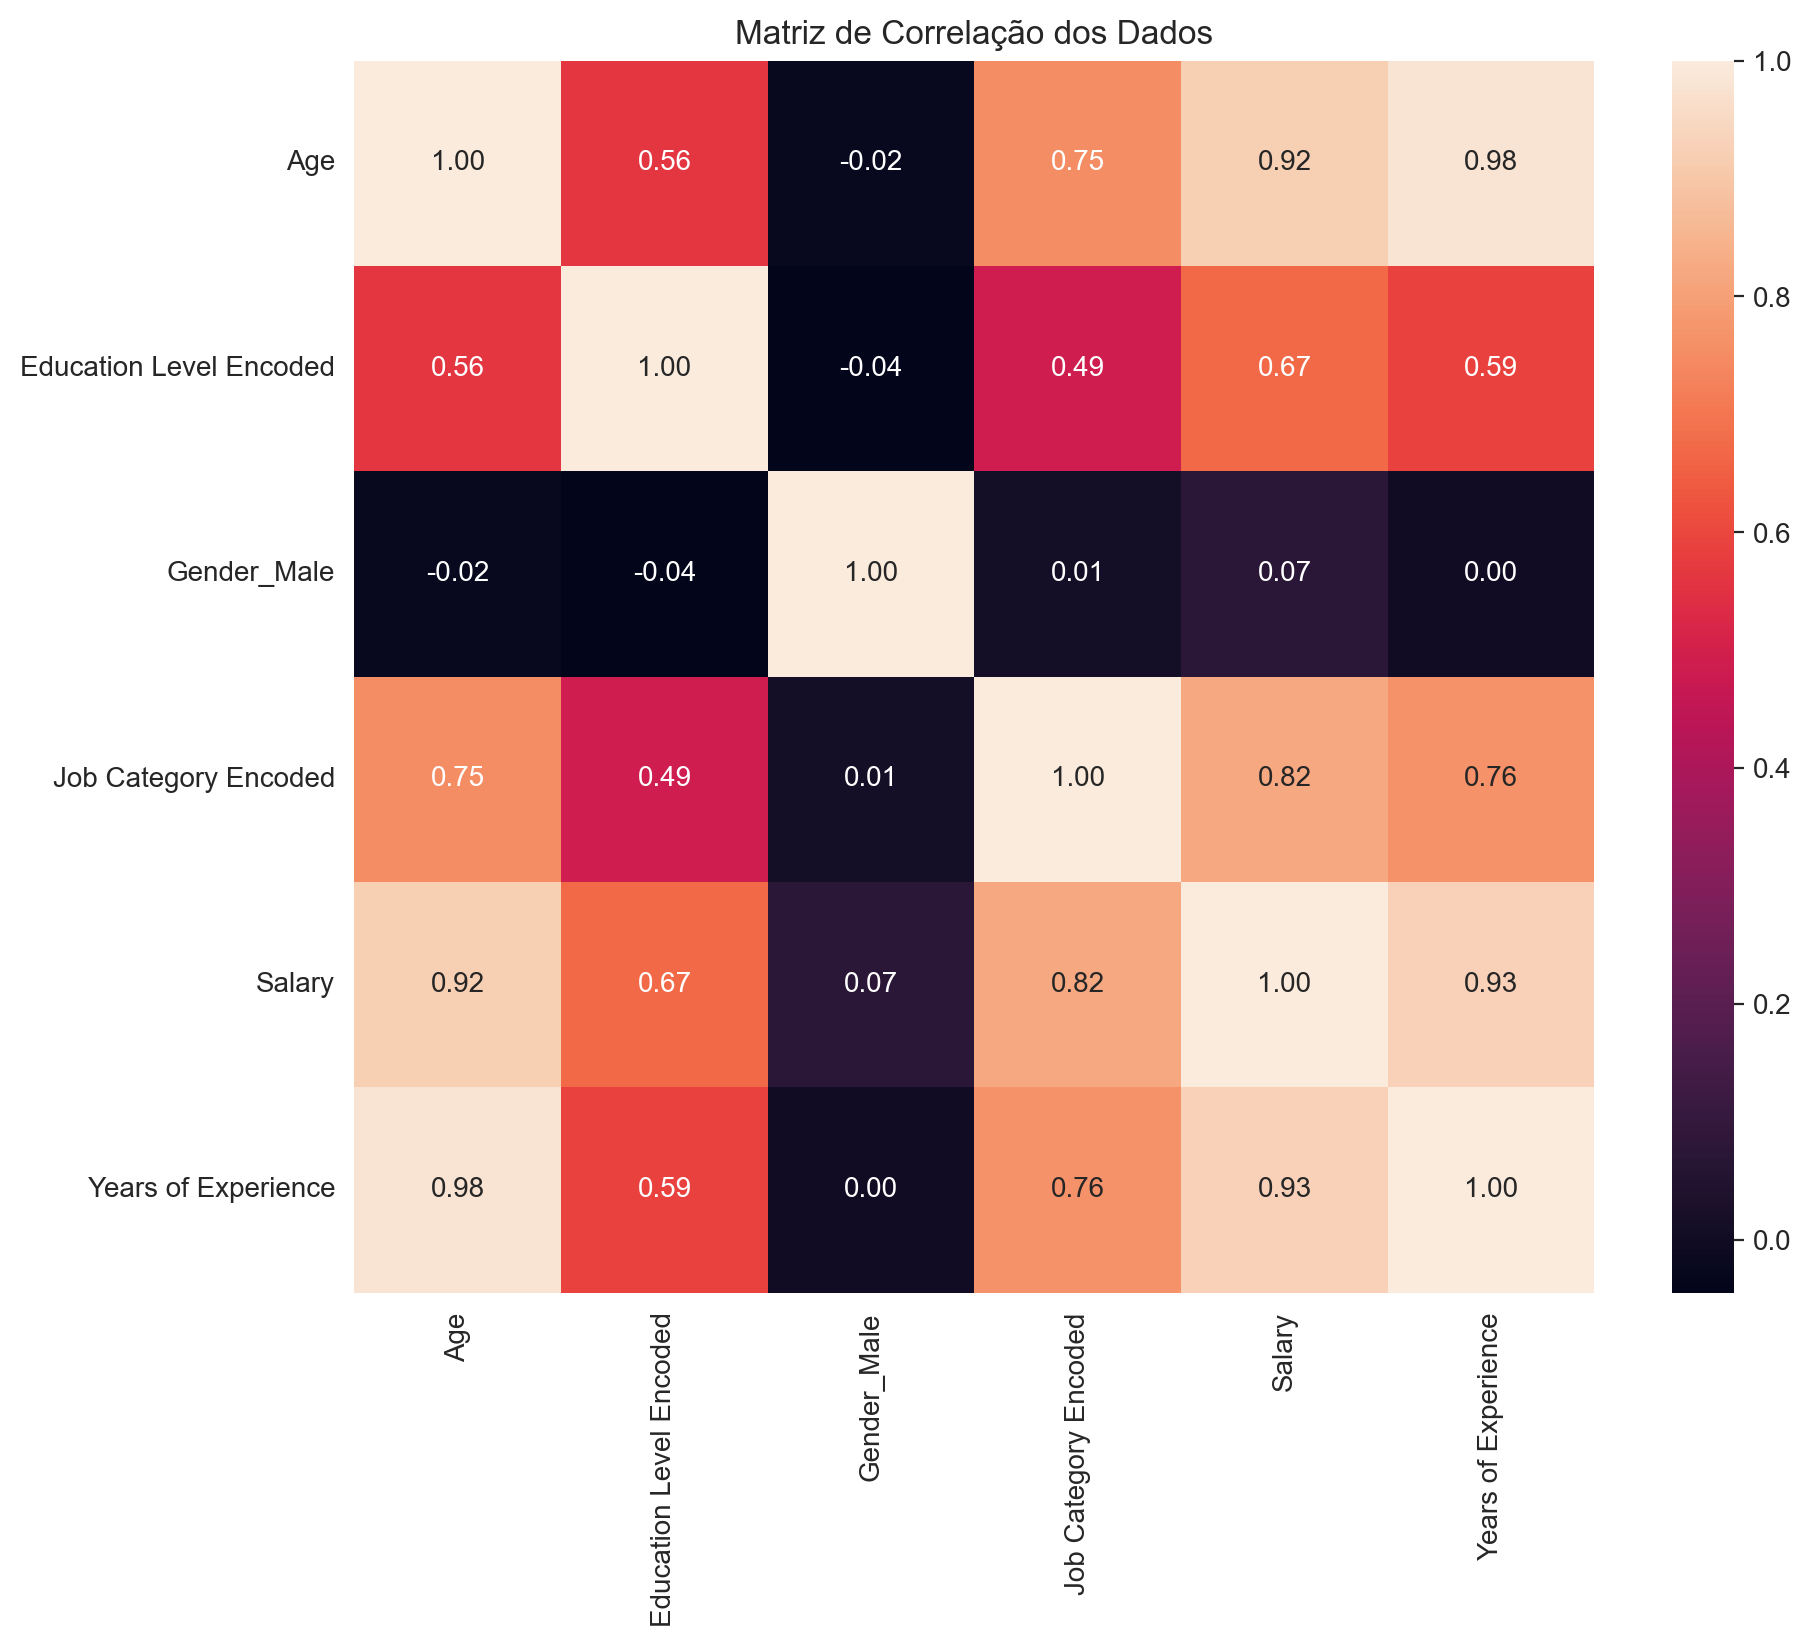

In [40]:
# Checking Data Correlations With Salary

plt.figure(figsize=(10,8), dpi=200)

sns.heatmap(transformed_df.corr(), annot=True, fmt=".2f")

plt.title('Matriz de Correlação dos Dados')

plt.show()

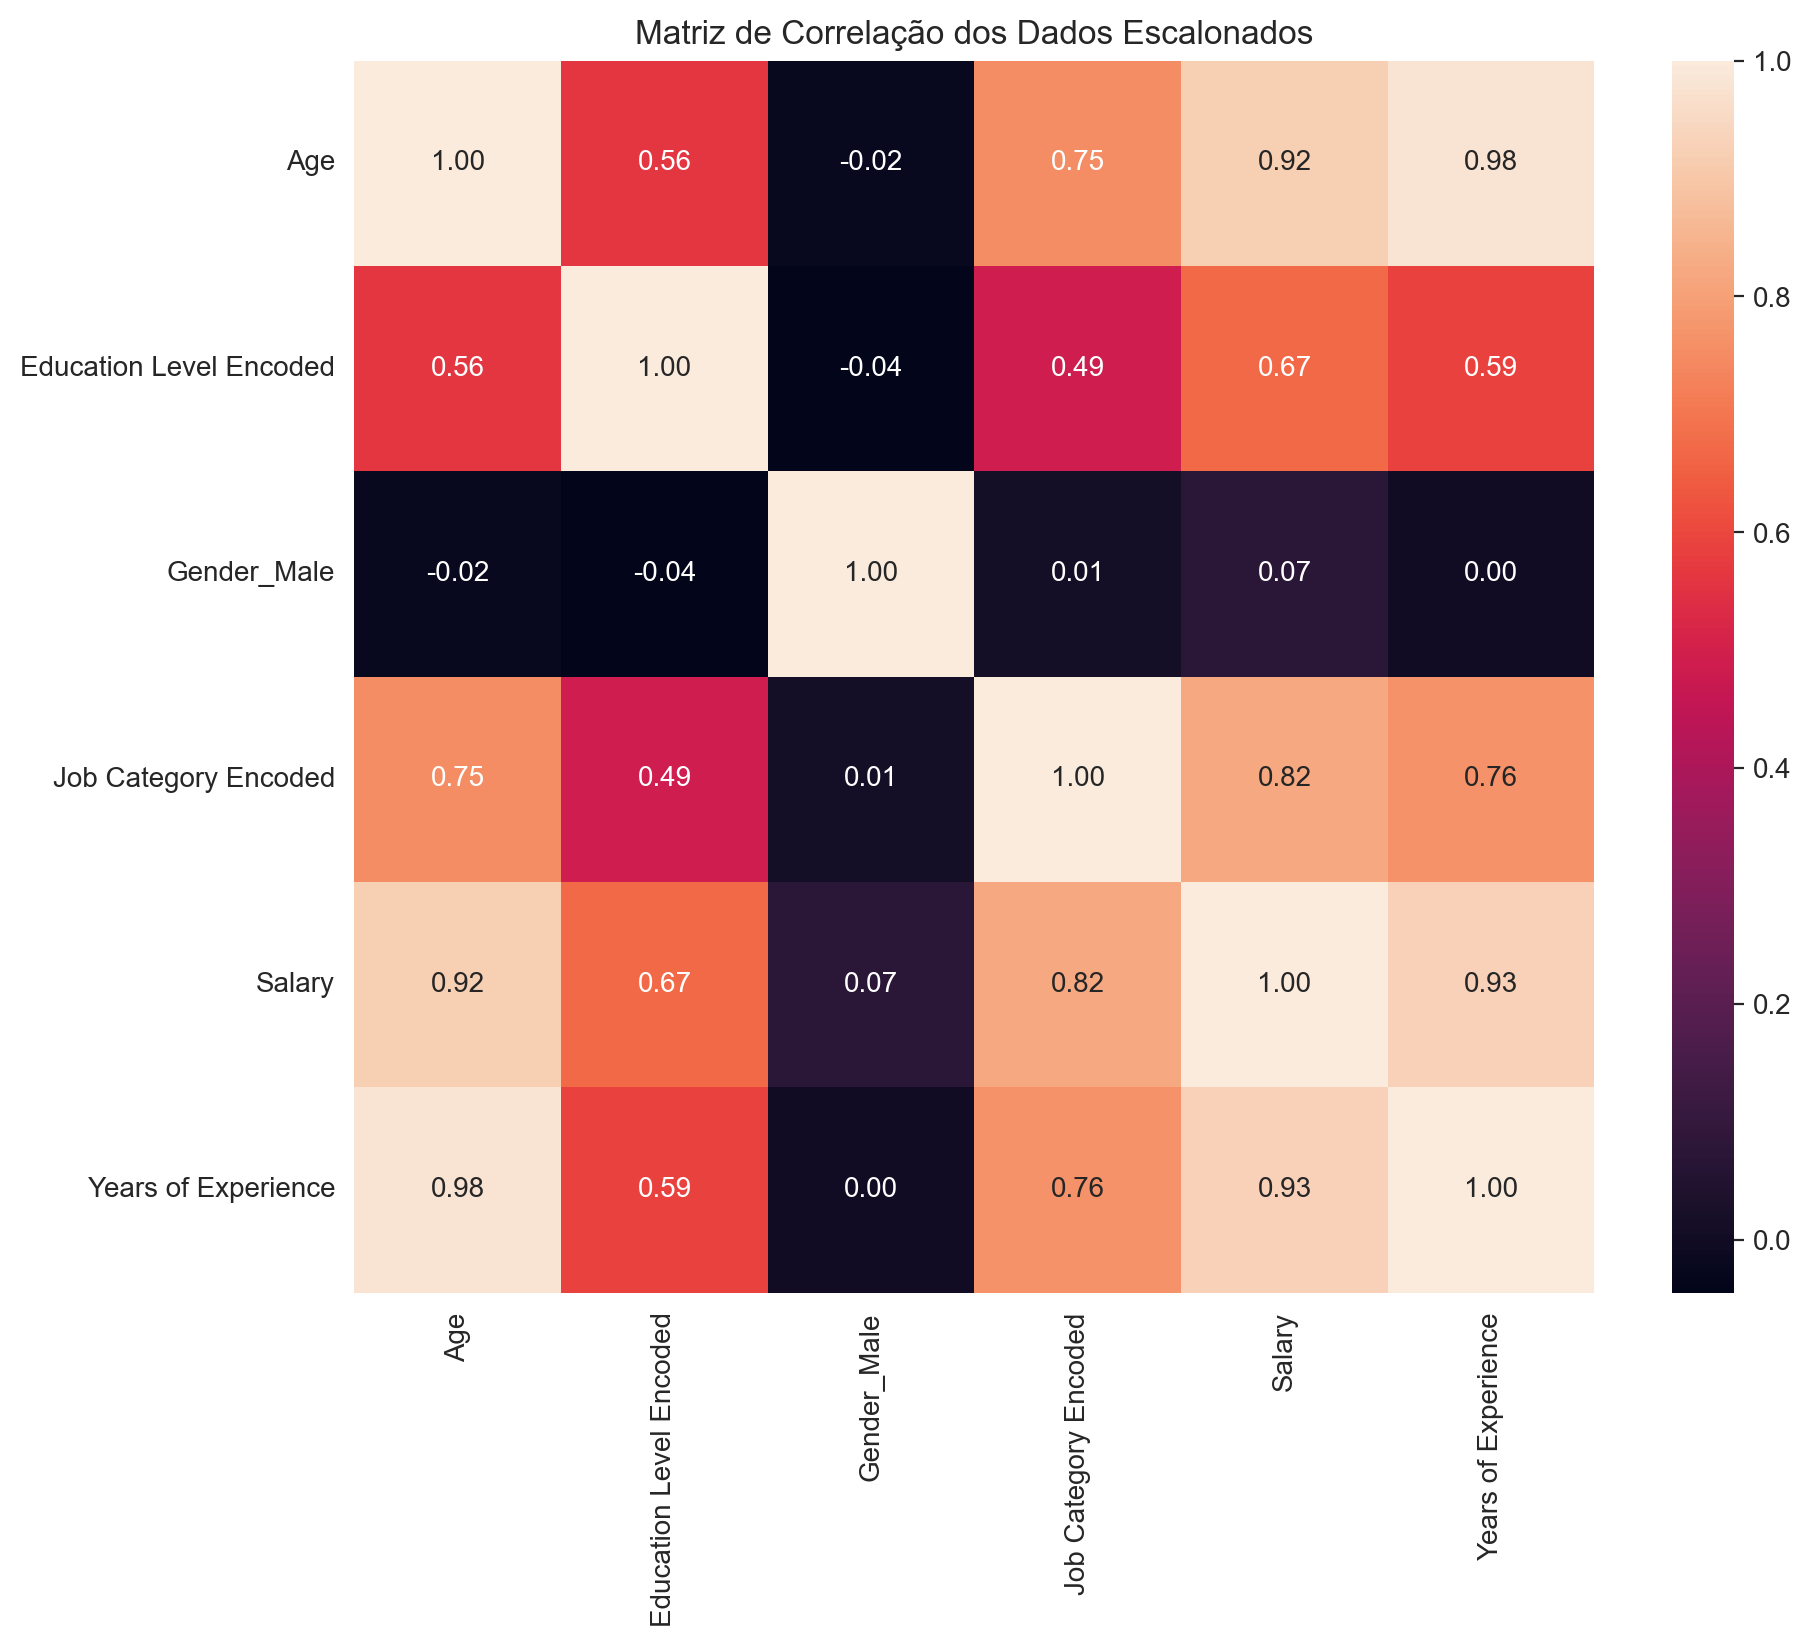

In [41]:
# Checking Data Correlations With Salary

plt.figure(figsize=(10,8), dpi=200)

sns.heatmap(scaled_transformed_df.corr(), annot=True, fmt=".2f")

plt.title('Matriz de Correlação dos Dados Escalonados')

plt.show()

Assim observa-se uma forte correlação entre nossa variável alvo (Salary) e Years of Experience, Job Category Encoded, Education Level Encoded e Age. Por outro lado, a variável representativa do gênero (Gender Male) não possui alta correlação com Salary. 

## Modeling

### 1. A partir das atividades realizadas no TP5 e TP7, crie um modelo de regressão linear para sua base de dados escolhidas e 2. Avalie a qualidade do seu modelo através das métricas de MSE, RMSE e MAE

Nas modelagens realizadas, não se observou diferença significativa nos resultados devido à aplicação do standard scaler, assim optou-se por apresentar o modelo sem a aplicação da transformação. Adicionalmente, em testes realizados observou-se uma melhoria do modelo sem a inclusão da variável age. 

Inicialmente optou-se por fazer o teste sem age, pois age e years of experience são duas variáveis altamente correlacionadas, em modelos de regressão linear variáveis altamente correlacionadas podem trazer ruído para a modelagem, prejudicando o modelo. No caso em análise, observou-se uma melhoria do modelo sem age. 

Outro ponto interessante observado foi que em que pese a baixa correlação entre o gênero da pessoa e o salário, o modelo performou melhor com a variável Gender_Male do que sem ela.

Por fim, foram testados diferentes percentuais de split, 30:70, 25:75 e 20:80, sendo o último o que apresentou melhor desempenho. Acreditamos que isso ocorreu devido à baixa quantidade de dados disponíveis.

Nesse sentido, o modelo apresentado a seguir não possui age como feature e foi gerado com um split 20:80.

In [42]:
X = transformed_df.drop(['Salary', 'Age'],axis=1)
X

,Education Level Encoded,Gender_Male,Job Category Encoded,Years of Experience
0,0,True,1,5.0
1,1,False,1,3.0
2,2,True,2,15.0
3,0,False,1,7.0
4,1,True,3,20.0
...,...,...,...,...
368,0,False,2,8.0
369,1,True,3,19.0
370,0,False,0,2.0
371,0,True,2,7.0


In [43]:
y = transformed_df['Salary']
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
368     85000.0
369    170000.0
370     40000.0
371     90000.0
372    150000.0
Name: Salary, Length: 373, dtype: float64

In [44]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# creating and training the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [46]:
# predicting
y_pred = linreg.predict(X_test)

In [47]:
# evaluating
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f' mse = {mse},\n mae = {mae},\n rmse = {rmse}, \n r2 score = {r2}')

 mse = 184698075.7181448,
 mae = 9357.829372835533,
 rmse = 13590.36701925834, 
 r2 score = 0.922964862682809


In [48]:
pd.DataFrame(data={'Predicted value' :y_pred, 'Actual Value':y_test})

,Predicted value,Actual Value
327,178698.472012,180000.0
33,84182.554270,65000.0
15,116925.434376,125000.0
314,93831.560992,80000.0
57,162187.535881,140000.0
...,...,...
94,77881.374888,75000.0
195,101600.754529,90000.0
311,51786.716965,60000.0
292,128537.391648,140000.0


In [49]:
linreg.score(X_test, y_test)

0.922964862682809

In [50]:
transformed_df.describe()

,Age,Education Level Encoded,Job Category Encoded,Salary,Years of Experience
count,373.000000,373.000000,373.000000,373.000000,373.000000
mean,37.431635,0.536193,1.402145,100577.345845,10.031635
std,7.069073,0.723569,0.980561,48240.013482,6.555779
min,23.000000,0.000000,0.000000,350.000000,0.100000
25%,31.000000,0.000000,1.000000,55000.000000,4.000000
50%,36.000000,0.000000,2.000000,95000.000000,9.000000
75%,44.000000,1.000000,2.000000,140000.000000,15.000000
max,53.000000,2.000000,3.000000,250000.000000,25.000000


## Conclusão

Considerando a quantidade de dados disponíveis bem como as métricas apresentadas, o modelo foi bem sucedido em predizer o salário a partir do nível de escolaridade, da categoria do trabalho, do gênero e dos anos de experiência.